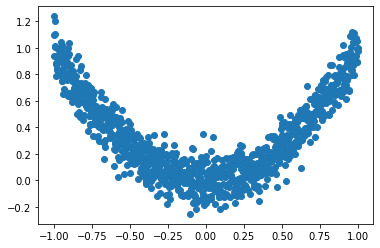

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9


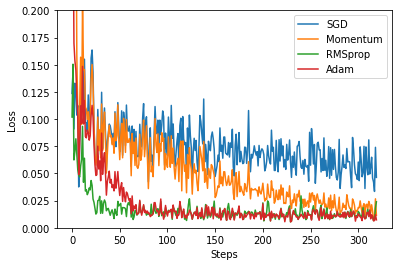

In [1]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

LR = 0.01
BATCH_SIZE = 32
EPOCH = 10

# fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1024), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

class OptimizerNet:
    def __init__(self, name):
        self.name = name
        self.opt = None
        self.net = Net()
        self.loss_func = torch.nn.MSELoss()
        
        if name == "SGD":
            self.opt = torch.optim.SGD(self.net.parameters(), lr=LR)
        elif name == "Momentum":
            self.opt = torch.optim.SGD(self.net.parameters(), lr=LR, momentum=0.8)
        elif name == "RMSprop":
            self.opt = torch.optim.RMSprop(self.net.parameters(), lr=LR, alpha=0.9)
        elif name == "Adam":
            self.opt = torch.optim.Adam(self.net.parameters(), lr=LR, betas=(0.9, 0.99))
        self.l_his = []

    def train_step(self, b_x, b_y):
        output = self.net(b_x)              # get output for every net
        loss = self.loss_func(output, b_y)  # compute loss for every net
        self.opt.zero_grad()                # clear gradients for next train
        loss.backward()                # backpropagation, compute gradients
        self.opt.step()                     # apply gradients
        self.l_his.append(loss.item()) 

class TestNets:
    def __init__(self):
        self._nets = [OptimizerNet("SGD"),
                     OptimizerNet("Momentum"),
                     OptimizerNet("RMSprop"),
                     OptimizerNet("Adam")]
        self.max = len(self._nets)

    def __iter__(self):
        self.n = 0
        return self
    
    def __next__(self):
        if self.n < self.max:
            result = self._nets[self.n]
            self.n += 1
            return result
        else:
            raise StopIteration
        return

#nets = TestNets()
nets = [OptimizerNet("SGD"),
        OptimizerNet("Momentum"),
        OptimizerNet("RMSprop"),
        OptimizerNet("Adam")]
loss_func = torch.nn.MSELoss()

# training
for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (batch_x, batch_y) in enumerate(loader):          # for each training step
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        for opt_net in nets:
            opt_net.train_step(b_x, b_y)

for opt_net in nets:
    plt.plot(opt_net.l_his, label=opt_net.name)
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()            